<a href="https://colab.research.google.com/github/waynuts/Machine-Learning-Klasifikasi-Gambar/blob/main/Proyek_Akhir_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-10 06:23:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.14MB/s    in 5m 13s  

2021-05-10 06:28:33 (1006 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip

import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors', seed = 1337, ratio = (.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 4035.77 files/s]


In [ ]:
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
# membuat sebuah objek ImageDataGenerator untuk data training dan data testing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/20
25/25 - 30s - loss: 0.9351 - accuracy: 0.5450 - val_loss: 0.6858 - val_accuracy: 0.7688
Epoch 2/20
25/25 - 29s - loss: 0.4312 - accuracy: 0.8475 - val_loss: 0.2794 - val_accuracy: 0.9062
Epoch 3/20
25/25 - 29s - loss: 0.3067 - accuracy: 0.8788 - val_loss: 0.2264 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 31s - loss: 0.2599 - accuracy: 0.9087 - val_loss: 0.2826 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 29s - loss: 0.2173 - accuracy: 0.9275 - val_loss: 0.2582 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 29s - loss: 0.1501 - accuracy: 0.9500 - val_loss: 0.1918 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 29s - loss: 0.1564 - accuracy: 0.9463 - val_loss: 0.1515 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 29s - loss: 0.1362 - accuracy: 0.9463 - val_loss: 0.1208 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 29s - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.1509 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 29s - loss: 0.1190 - accuracy: 0.9563 - val_loss: 0.1236 - val_accuracy: 0.9563
Epoch 11/

Saving gunting.jpg to gunting.jpg
gunting.jpg
scissors


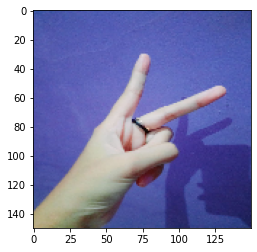

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('scissors')
  elif classes[0][1]==1:
    print('paper')
  elif classes[0][2]==1:
    print('rock')